In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import dist

# Functions

### Fuzzy c mean functions

In [2]:
def fuzzy_c_means(x, c, m):
    v = generate_initial_centroid(c, x)
    for i in range(100):
        u = calculate_membership_of_data(c, m, v, x)
        v = update_the_centroid(m, u, x)

    return u, v

In [3]:
def generate_initial_centroid(c, x):
    v = np.zeros((c, x.shape[1]))
    for j in range(c):
        v[j] = generate_random_centroid(x)
    return v

In [4]:
def generate_random_centroid(data):
    min_values = np.min(data, 0)
    max_values = np.max(data, 0)
    return np.random.uniform(low=min_values, high=max_values)

In [5]:
def calculate_membership_of_data(c, m, v, x):
    number_of_data = x.shape[0]
    u = np.zeros((c, number_of_data))
    for i in range(c):
        for k in range(number_of_data):
            denominator = 0
            for j in range(c):
                denominator += (dist(x[k], v[i]) / dist(x[k], v[j])) ** (2 / (m - 1))
            u[i, k] = 1 / denominator
    return u

In [6]:
def update_the_centroid(m, u, x):
    u_power_m = np.power(u, m)
    numerator = np.dot(u_power_m, x)
    denominator = np.sum(u_power_m, axis=1).reshape(-1, 1)
    return numerator / denominator

### Cost function

In [7]:
def calculate_cost(x, u, v, c, m):
    cost = 0
    number_of_data = len(x)

    for j in range(number_of_data):
        for i in range(c):
            cost += np.power(u[i, j], m) * np.power(np.linalg.norm(x[j] - v[i]), 2)
    return cost

### Plot function

In [8]:
def plot_the_clustering(ax, data, v, cluster, title):
    ax.scatter(x=data[:, 0], y=data[:, 1], c=cluster)
    ax.plot(v[:, 0], v[:, 1], 'or')
    ax.set(xlabel="x1", ylabel='x2', title=title);

# Reading data

In [9]:
data1 = np.genfromtxt('Data/data1.csv', delimiter=',')
data2 = np.genfromtxt('Data/data2.csv', delimiter=',')
data3 = np.genfromtxt('Data/data3.csv', delimiter=',')
data4 = np.genfromtxt('Data/data4.csv', delimiter=',')

# --- First dataset

In [10]:
costs = []
m = 1.2
for c in range(1, 6):
    u, v = fuzzy_c_means(data1, c, m)
    costs.append(calculate_cost(data1, u, v, c, m))

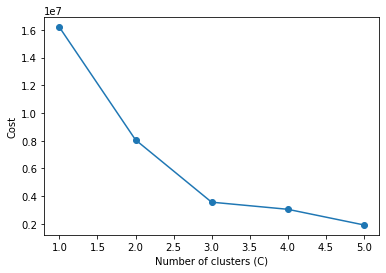

In [11]:
fig, ax = plt.subplots()
ax.plot([i for i in range (1, 6)], costs,
        marker='o')
ax.set(xlabel="Number of clusters (C)", ylabel='Cost');

### C = 3 is the best

In [12]:
u, v = fuzzy_c_means(data1, c=3, m=1.2)
cluster = u[0] * 0 + u[1] * 0.5 + u[2] * 1

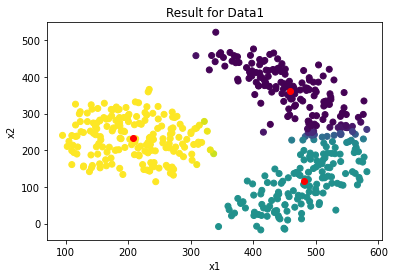

In [13]:
fig, ax = plt.subplots()
plot_the_clustering(ax, data1, v, cluster, title='Result for Data1')

### Trying different m values

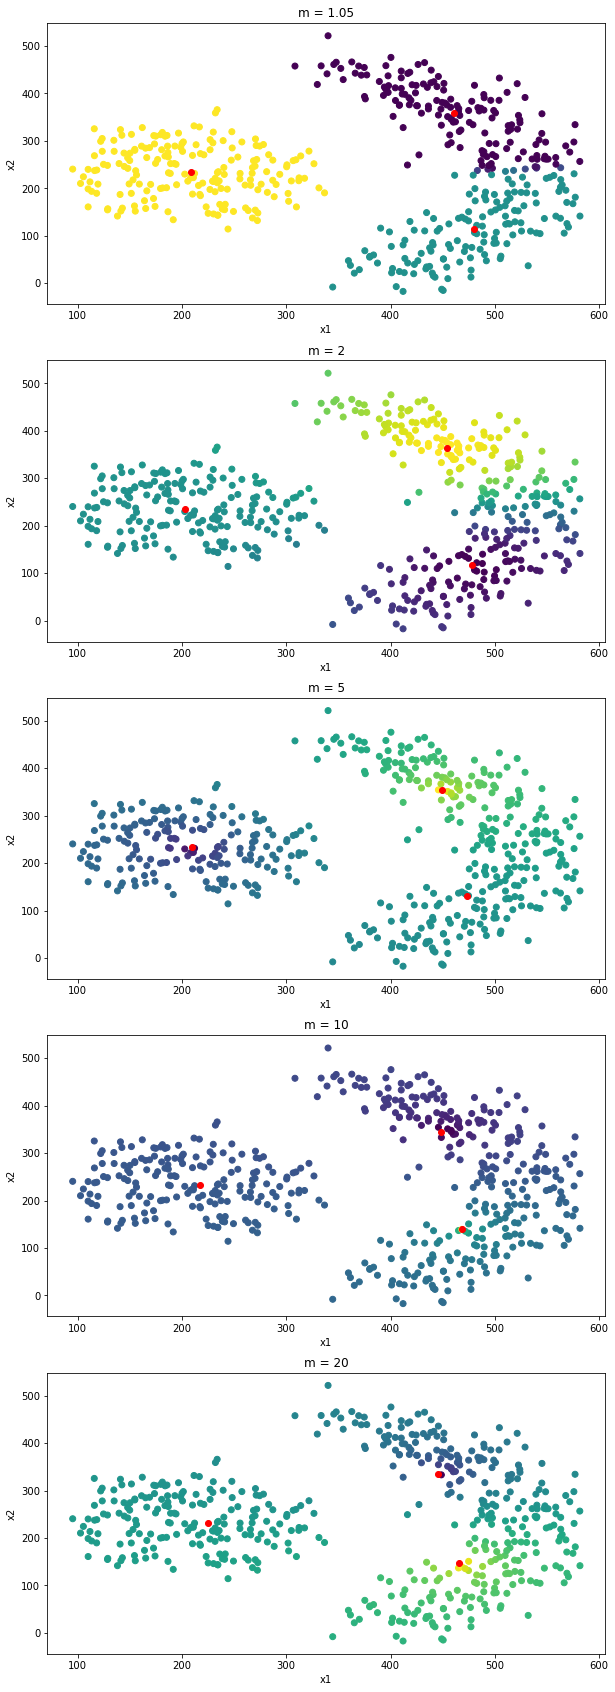

In [14]:
fig, ax = plt.subplots(nrows=5, figsize=(10, 30))

m_list = [1.05, 2, 5, 10, 20]
costs = []
for i, m in enumerate(m_list):
    u, v = fuzzy_c_means(data1, c=3, m=m)
    cluster = u[0] * 1 + u[1] * 0.5 + u[2] * 0
    plot_the_clustering(ax[i], data1, v, cluster, title=f'm = {m}')
    costs.append(calculate_cost(data1, u, v, c=3, m=m))

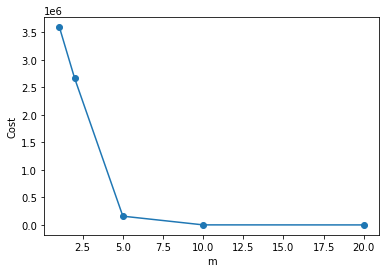

In [15]:
fig, ax = plt.subplots()
ax.plot(m_list, costs,
        marker='o')
ax.set(xlabel="m", ylabel='Cost');

## Result discussion
Overall, it is apparent that as the value of m increases, we reach a more uniform clustering. The reason for this is $u_{ik}^{m}$ in the formula. Since $u_{ik}$ has a value between 0 and 1, the more significant m we put on the formula, the smaller $u_{ik}$ will become. Therefore, it is highly recommended to assign a value between 1 and 2 for the m.  
The value of cost function, however, decreases with the rise of m. As we see from the different plots, The centroid is in the same location for all of them. Hence, $||X_{j} - V_{i}||^{2}$ is the same for all of them and with the grow of m, $u_{ik}^{m}$ decreases and consequently, a less value for cost function is observable.

# -- Second dataset

In [16]:
costs = []
m = 1.2
for c in range(1, 6):
    u, v = fuzzy_c_means(data2, c, m)
    costs.append(calculate_cost(data2, u, v, c, m))

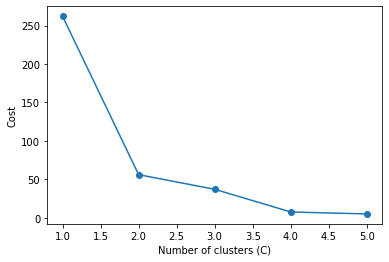

In [17]:
fig, ax = plt.subplots()
ax.plot([i for i in range (1, 6)], costs,
        marker='o')
ax.set(xlabel="Number of clusters (C)", ylabel='Cost');

### C = 2 is the best

# -- Third dataset

In [18]:
costs = []
m = 1.2
for c in range(1, 6):
    u, v = fuzzy_c_means(data3, c, m)
    costs.append(calculate_cost(data3, u, v, c, m))

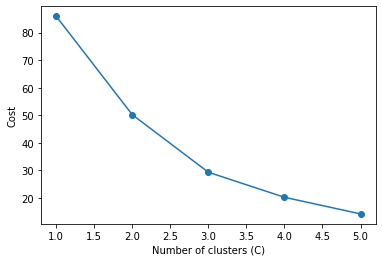

In [19]:
fig, ax = plt.subplots()
ax.plot([i for i in range (1, 6)], costs,
        marker='o')
ax.set(xlabel="Number of clusters (C)", ylabel='Cost');

### C = 3 is the best

In [20]:
u, v = fuzzy_c_means(data3, c=3, m=1.2)
cluster = u[0] * 0 + u[1] * 0.5 + u[2] * 1

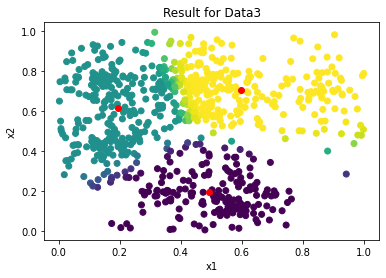

In [21]:
fig, ax = plt.subplots()
plot_the_clustering(ax, data3, v, cluster, title='Result for Data3')

# -- Forth dataset

In [22]:
costs = []
m = 1.2
for c in range(1, 6):
    u, v = fuzzy_c_means(data4, c, m)
    costs.append(calculate_cost(data4, u, v, c, m))

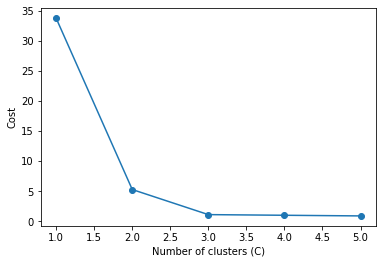

In [23]:
fig, ax = plt.subplots()
ax.plot([i for i in range (1, 6)], costs,
        marker='o')
ax.set(xlabel="Number of clusters (C)", ylabel='Cost');

### C = 2 is the best